<a href="https://colab.research.google.com/github/purvabadhe/Artificial-Intelligence-Lab/blob/main/Genetic%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The genetic algorithm is a search-based optimization technique. It is frequently used to find the optimal or nearest optimal solution. It was introduced by John Holland. It is based on Darwins Natural Selection Theory. Before explaining how the genetic algorithm works let me first explain Darwin’s theory on natural selection. In his theory, he defined natural selection as the “principle by which each slight variation [of a trait], if useful, is preserved”. The concept was simple but powerful: individuals best adapted to their environments are more likely to survive and reproduce.

Population, Chromosome, Gene


At the beginning of this process, we need to initialize some possible solutions to this problem. The population is a subset of all possible solutions to the given problem. In another way, we can say that the population is a set of chromosomes. A chromosome is one of that solution to that current problem. And each chromosome is a set of genes.

For simplicity, We can describe a chromosome as a string. So, we can say that a population is a collection of some string(each character is a binary value, either 0 or 1 ). And each character of the string is a gene.

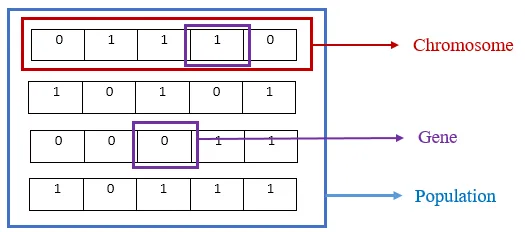

For starting the process of the genetic algorithm, we first need to initialize the population. We can initialize the population in two ways. The first one is random and the second one is heuristical. It is always better to start the algorithm with some random population.

Fitness Function

After initializing the population, we need to calculate the fitness value of these chromosomes. Now the question is what this fitness function is and how it calculates the fitness value.

As an example, let consider that we have an equation, f(x) = -x² + 5 .We need the solution for which it has the maximum value and the constraint is 0≤x≤31.

Now, let consider that we have a random population of four chromosomes like below. The length of our chromosome is 5 as 2⁵=32 and 0≤x≤31.

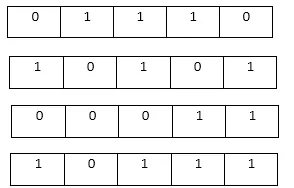

Our fitness function will calculate the functional value of each chromosome as stated in the problem statement :

For the 1st chromosome, 01110 means 14 in integer. So, f(x) = -(14*14) + 5 = -191.

For the 2nd chromosome, 10101 means 21 in integer. So, f(x) = -(21*21) + 5 = -436.

For the 3rd chromosome, 00011 means 3 in integer. So, f(x) = -(3*3) + 5 = -4.

For the 4th chromosome, 10111 means 23 in integer. So, f(x) = -(23*23) + 5 = -524.

Parent Selection

Parent selection is done by using the fitness values of the chromosomes calculated by the fitness function. Based on these fitness values we need to select a pair chromosomes with the highest fitness value.


Crossover

Crossover is used to vary the programming of the chromosomes from one generation to another by creating children or offsprings. Parent chromosomes are used to create these offsprings(generated chromosomes).

To create offsprings, there are some ways like a single-point crossover, two or multi-point crossover.

For a single point crossover, first, we need to select a point and then exchange these portions divided by this point between parent chromosomes to create offsprings. You can use the color combination for easy understanding.


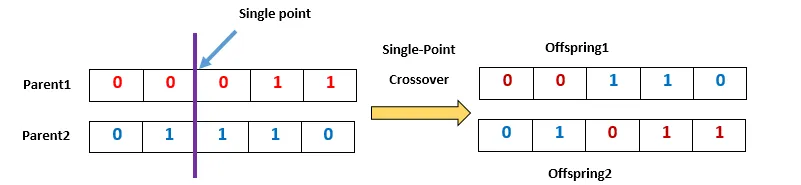


Mutation

Mutation brings diversity to the population. There are different kinds of mutations like Bit Flip mutation, Swap mutation, Inversion mutation, etc. These are so so simple.

In Bit Flip mutation, Just select one or more bits and then flip them. If the selected bit is 0 then turn it to 1 and if the selected bit is 1 then turn it to 0.

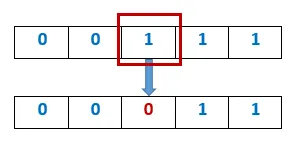

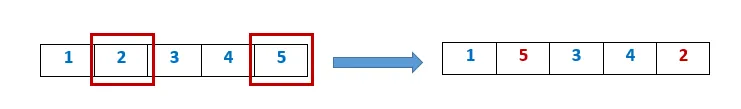

## Problem Statement

Let consider that we have an equation, f(x) = -x² + 5 . We need the solution for which it has the maximum value and the constraint is 0≤x≤31. To select an initial population use the probability 0.2.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#initialize population
import random
best=-100000
populations =([[random.randint(0,1) for x in range(6)] for i in range(4)])
print(type(populations))
parents=[]
new_populations = []
print(populations)

<class 'list'>
[[1, 1, 0, 0, 1, 1], [1, 1, 1, 0, 1, 0], [1, 1, 0, 1, 0, 0], [1, 1, 0, 1, 1, 1]]


In [ ]:
#fitness score calculation ............
def fitness_score() :
    global populations,best
    fit_value = []
    fit_score=[]
    for i in range(4) :
        chromosome_value=0

        for j in range(5,0,-1) :
            chromosome_value += populations[i][j]*(2**(5-j))
        chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
        print(chromosome_value)
        fit_value.append(-(chromosome_value**2) + 5 )
    print(fit_value)
    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    best= fit_value[0]

fitness_score()

-19
-26
-20
-23
[-356, -671, -395, -524]


In [ ]:
#print(type(populations))
#selecting parents....
def selectparent():
    global parents
    #global populations , parents
    parents=populations[0:2]
    print(type(parents))
    print(parents)
selectparent()

<class 'tuple'>
([1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0])


In [ ]:
#single-point crossover .........

def crossover() :
    global parents

    cross_point = random.randint(0,5)
    parents=parents + tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:6])])
    parents =parents+ tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:6])])

    print(parents)


crossover()

([1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [1, 1, 0, 0, 1, 1])


In [ ]:
def mutation() :
    global populations, parents
    mute = random.randint(0,49)
    if mute == 20 :
        x=random.randint(0,3)
        y = random.randint(0,5)
        parents[x][y] = 1-parents[x][y]
    populations = parents
    print(populations)
mutation()

([1, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [1, 1, 0, 0, 1, 1])


In [ ]:
for i in range(1000) :
    fitness_score()
    selectparent()
    crossover()
    mutation()
print("best score :")
print(best)
print("sequence........")
print(populations[0])

Streaming output truncated to the last 5000 lines.
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
-2
-2
-2
-2
[1, 1, 1, 1]
<class 'tuple'>
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
-2
-2
-2
-2
[1, 1, 1, 1]
<class 'tuple'>
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
-2
-2
-2
-2
[1, 1, 1, 1]
<class 'tuple'>
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
-2
-2
-2
-2
[1, 1, 1, 1]
<class 'tuple'>
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0])
([1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 